In [1]:
import tensorflow as tf

# Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


For now, let's import from the open dataset
#TODO connect to DVC pipeline

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

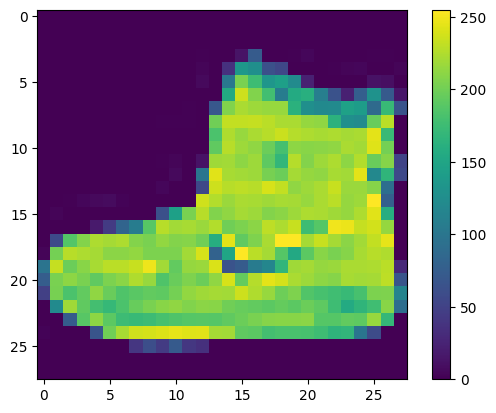

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

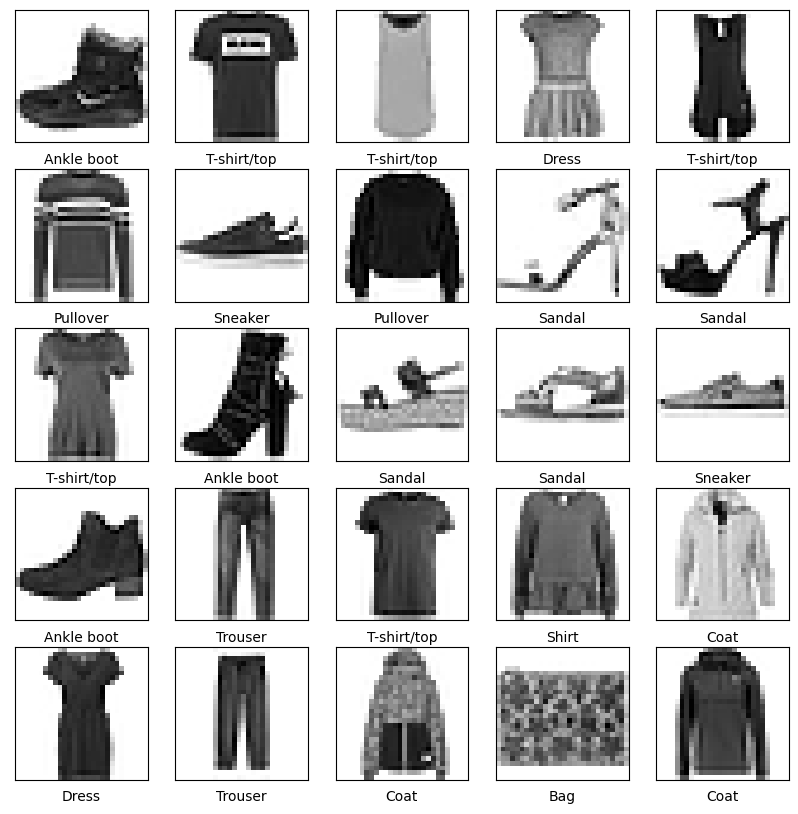

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()

model.fit(train_images, train_labels, epochs=7)
tracker.stop()

[codecarbon INFO @ 15:33:06] [setup] RAM Tracking...
[codecarbon INFO @ 15:33:06] [setup] GPU Tracking...
[codecarbon INFO @ 15:33:06] No GPU found.
[codecarbon INFO @ 15:33:06] [setup] CPU Tracking...
[codecarbon WARNING @ 15:33:07] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS detected: Please install Intel Power Gadget or enable PowerMetrics sudo to measure CPU

[codecarbon WARNING @ 15:33:07] We saw that you have a Apple processor but we don't know it. Please contact us.
[codecarbon INFO @ 15:33:07] CPU Model on constant consumption mode: Apple processor
[codecarbon INFO @ 15:33:07] >>> Tracker's metadata:
[codecarbon INFO @ 15:33:07]   Platform system: macOS-11.0.1-arm64-arm-64bit
[codecarbon INFO @ 15:33:07]   Python version: 3.10.4
[codecarbon INFO @ 15:33:07]   CodeCarbon version: 2.7.1
[codecarbon INFO @ 15:33:07]   Available RAM : 8.000 GB
[codecarbon INFO @ 15:33:07]   CPU count: 8
[codecarbon INFO @ 15:33:07]   CPU model: Apple processor
[codecarbo

Epoch 1/7
   1/1875 [..............................] - ETA: 5:03 - loss: 2.4766 - accuracy: 0.0938

2024-10-07 15:33:08.715152: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 956us/step - loss: 0.4962 - accuracy: 0.8264
Epoch 2/7
1875/1875 [==============================] - 1s 685us/step - loss: 0.3735 - accuracy: 0.8651
Epoch 3/7
1875/1875 [==============================] - 1s 593us/step - loss: 0.3367 - accuracy: 0.8765
Epoch 4/7
1875/1875 [==============================] - 1s 586us/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/7
1875/1875 [==============================] - 1s 623us/step - loss: 0.2945 - accuracy: 0.8924
Epoch 6/7
1875/1875 [==============================] - 1s 547us/step - loss: 0.2802 - accuracy: 0.8959
Epoch 7/7
1875/1875 [==============================] - 1s 587us/step - loss: 0.2666 - accuracy: 0.9006


[codecarbon INFO @ 15:33:17] Energy consumed for RAM : 0.000008 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:33:17] Energy consumed for all CPUs : 0.000107 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:33:17] 0.000114 kWh of electricity used since the beginning.


1.9857977959754725e-05

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3481 - accuracy: 0.8730 - 165ms/epoch - 528us/step

Test accuracy: 0.8730000257492065


In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 297us/step


In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

Functions for plotting

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verification

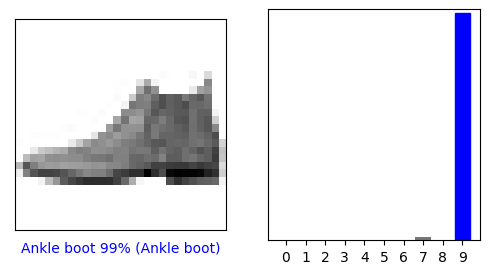

In [20]:
#Showing the first image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

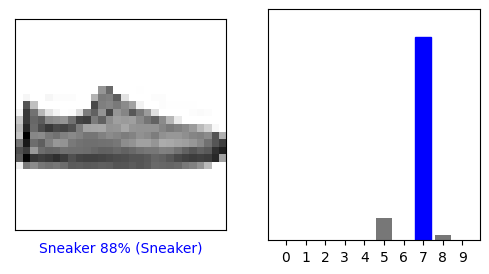

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## Plot the first x test images
## Color correct predictions in blue and incorrect predictions in red.
The model can be wrong even tho very confident

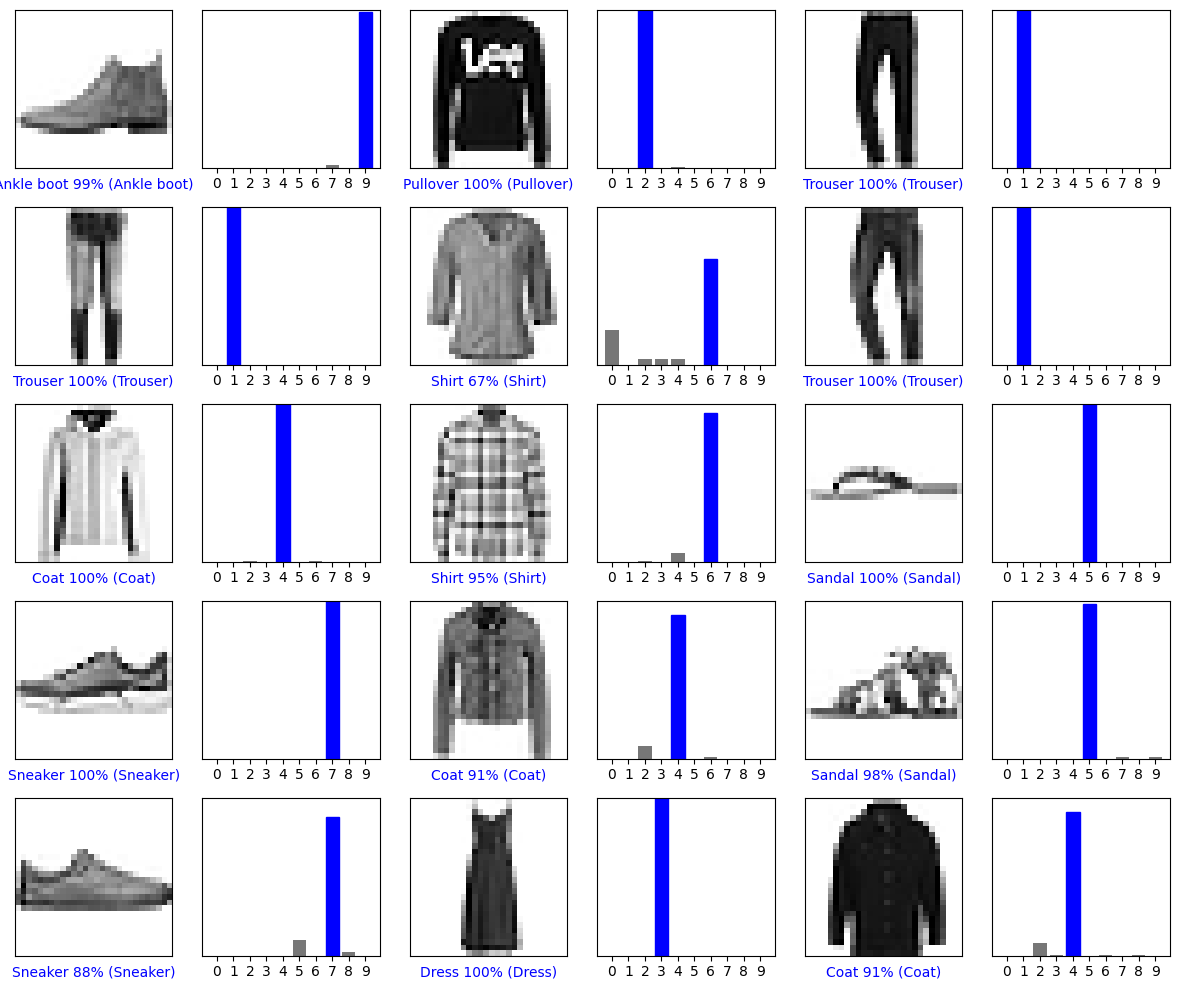

In [22]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use model for prediction

In [23]:
# Add the image to empty batch
img = test_images[1]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


1/1 [==============================] - 0s 8ms/step


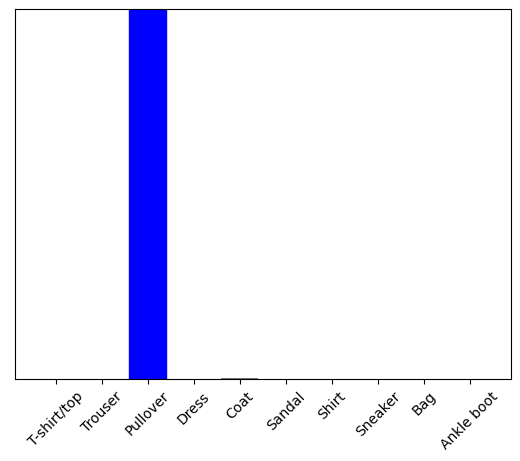

In [24]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [25]:
np.argmax(predictions_single[0])

2